In [1]:
from analyze import *

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cmcrameri import cm
import cmcrameri
from cycler import cycler

mpl.rc('image', cmap='cmc.batlow')
mpl.rc('text', usetex=True)


In [3]:
c1 = Chord([0,4,7])
c2 = Chord([0,1,2])
c3 = Chord([0])

In [4]:
key = Key("C")
chords = [c for c in combinations(range(12), 3)]
pairs = [(c, c2) for c, c2 in permutations(chords, 2)]


In [5]:
dist_mod_12(0, 8) + dist_mod_12(1,7) + dist_mod_12(2,6)
dist_mod_12([0,1,2], [8,7,6])

array([4, 6, 4], dtype=int32)

In [35]:
scaled_cosine_dist_triad_key(tiv(c1), tiv(key))

0.14920056833264164

In [39]:
np.max([anti_voice_leading(Chord(p[0]), Chord(p[1]), Key("C")) for p in pairs])

0.6393884388997763

In [6]:
anti_voice_leading(Chord([0,4,7]), Chord([2,7,11]), Key("C"))

0.18311829902738316

In [7]:
anti_voice_leading(Chord([8,7,6]), Chord([0,1,2]), Key("C"))

0.23089436346913317

C_NOTE_MIN = 1.0929416422891878
C_NOTE_MAX = 2.12247555540512


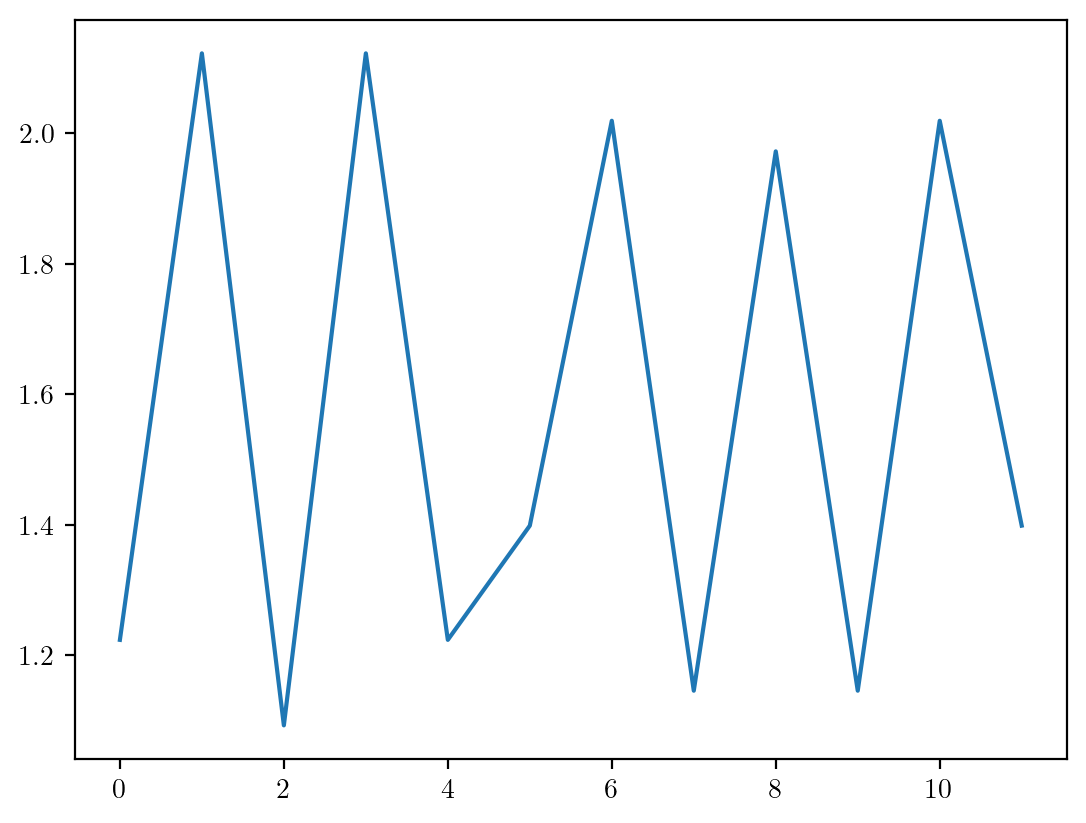

In [8]:
notes = [Note(pc) for pc in range(12)]
Tkey = tiv(Key("C"))
cos_dists = [TIV.cosine(tiv(n), Tkey) for n in notes]
import matplotlib.pyplot as plt
plt.plot(range(12), cos_dists)
min_cos = min(cos_dists)
max_cos = max(cos_dists)
print(f"C_NOTE_MIN = {min_cos}\nC_NOTE_MAX = {max_cos}")

C_NOTE_KEY_MIN: 0.2700623847954823, C_NOTE_KEY_MAX: 0.7620590374436943


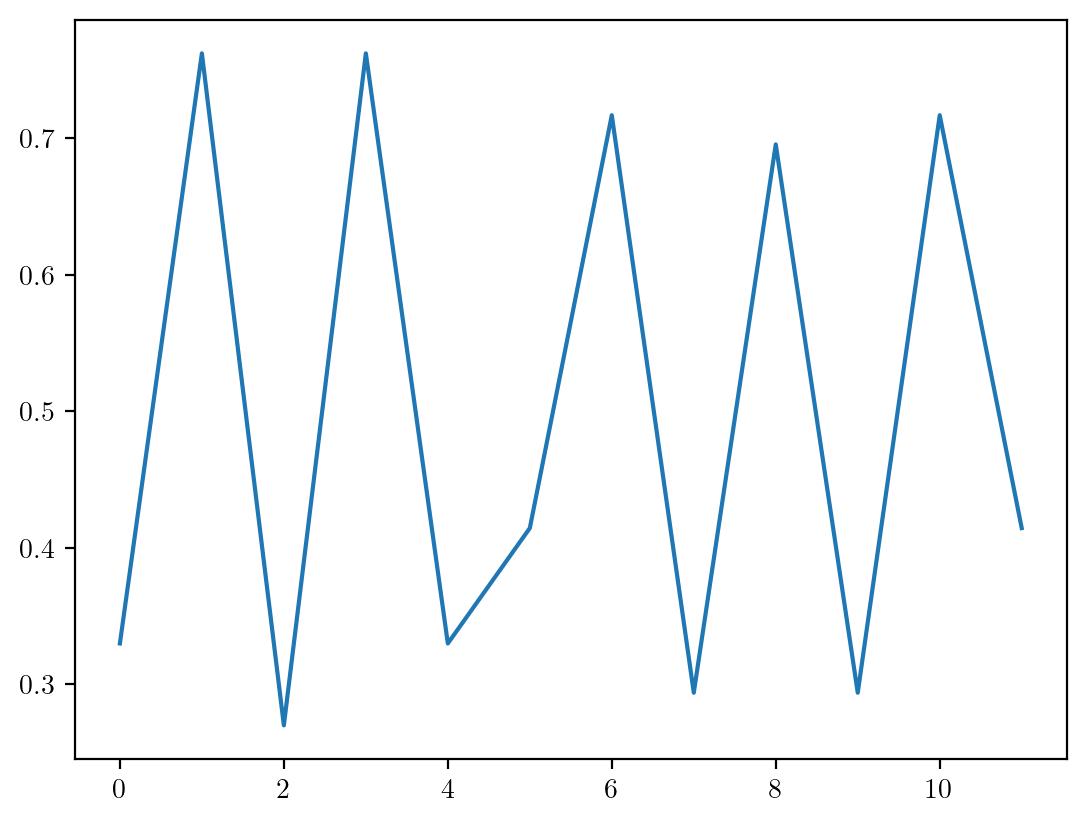

In [9]:
cos_dists = [scaled_cosine_dist_note_key(tiv(n), Tkey) for n in notes]
import matplotlib.pyplot as plt
plt.plot(range(12), cos_dists)
min_cos = min(cos_dists)
max_cos = max(cos_dists)
print(f"C_NOTE_KEY_MIN: {min_cos}, C_NOTE_KEY_MAX: {max_cos}")

In [10]:
scaled_cosine_dist_note_key(tiv([0]), tiv(Key("C")))

0.33002325681315114

In [11]:
cos_dists = [scaled_cosine_dist_triad_key(tiv(c), tiv(Key("C"))) for c in chords]
print(f"COS_TRIAD_KEY_MIN = {min(cos_dists)}\nCOS_TRIAD_KEY_MAX = {max(cos_dists)}")

COS_TRIAD_KEY_MIN = 0.0
COS_TRIAD_KEY_MAX = 1.0


In [12]:
notes_key_C = set(p.pitchClass for p in Key("C").pitches)
def chord_in_key_C(c, num = None):
    if num is None:
        num = len(c)
    return num == len(notes_key_C.intersection(set(c)))

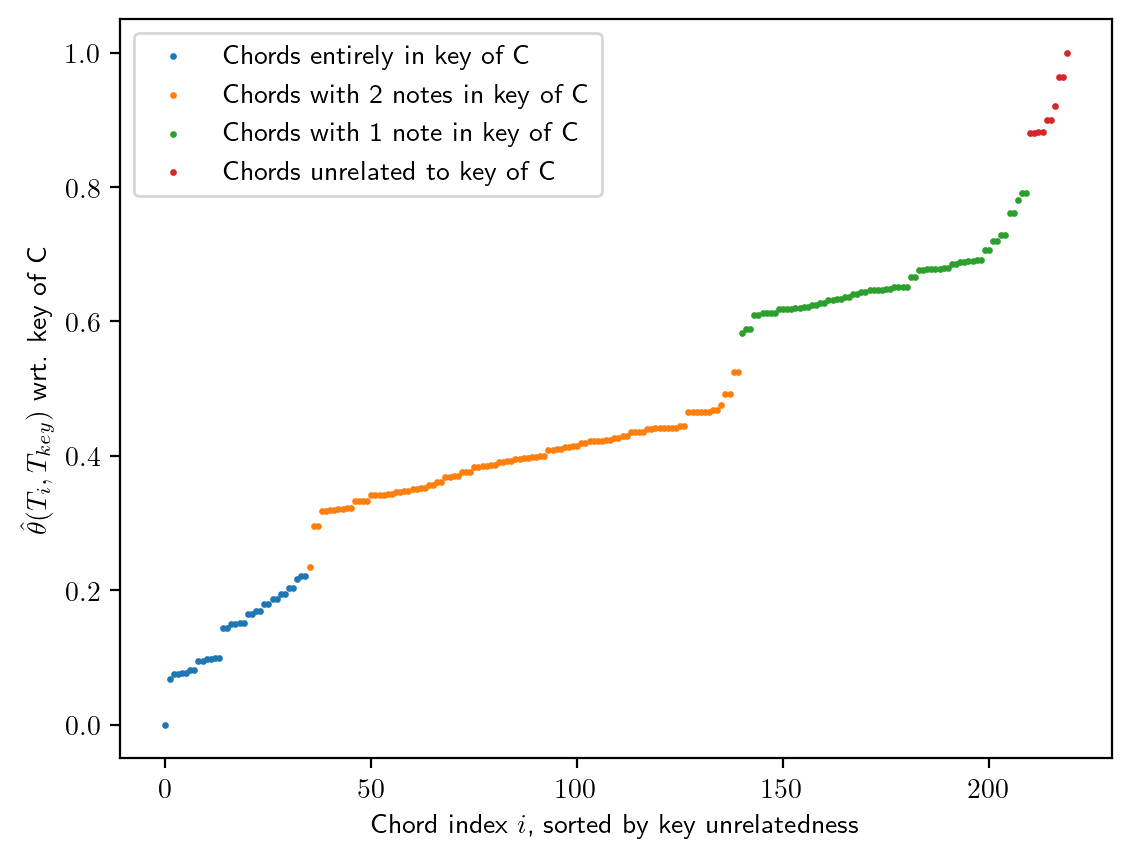

In [27]:
scaled_cos_dists = [scaled_cosine_dist_triad_key(tiv(c), tiv(Key("C"))) for c in chords]
order = np.argsort(scaled_cos_dists)
sorted_chords = [chords[i] for i in order]
sorted_cos_dists = np.asarray(scaled_cos_dists)[order]

C_chords = list(filter(lambda c: chord_in_key_C(c), sorted_chords))
C_chords_idx = [sorted_chords.index(c) for c in C_chords]
C_chords_cos_dists = [sorted_cos_dists[i] for i in C_chords_idx]

plt.scatter(C_chords_idx, C_chords_cos_dists, s=2, label="Chords entirely in key of C")

C_2_chords = list(filter(lambda c: chord_in_key_C(c, 2), sorted_chords))
C_2_chords_idx = [sorted_chords.index(c) for c in C_2_chords]
C_2_chords_cos_dists = [sorted_cos_dists[i] for i in C_2_chords_idx]
plt.scatter(C_2_chords_idx, C_2_chords_cos_dists, s=2, label="Chords with 2 notes in key of C")

C_1_chords = list(filter(lambda c: chord_in_key_C(c, 1), sorted_chords))
C_1_chords_idx = [sorted_chords.index(c) for c in C_1_chords]
C_1_chords_cos_dists = [sorted_cos_dists[i] for i in C_1_chords_idx]
plt.scatter(C_1_chords_idx, C_1_chords_cos_dists, s=2, label="Chords with 1 note in key of C")

C_0_chords = list(filter(lambda c: chord_in_key_C(c, 0), sorted_chords))
C_0_chords_idx = [sorted_chords.index(c) for c in C_0_chords]
C_0_chords_cos_dists = [sorted_cos_dists[i] for i in C_0_chords_idx]
plt.scatter(C_0_chords_idx, C_0_chords_cos_dists, s=2, label="Chords unrelated to key of C")

plt.xlabel("Chord index $i$, sorted by key unrelatedness")
plt.ylabel(r"$\hat{\theta}(T_i, T_{key})$ wrt. key of C")

plt.legend()
plt.savefig("key_unrelatedness.png", dpi=300)


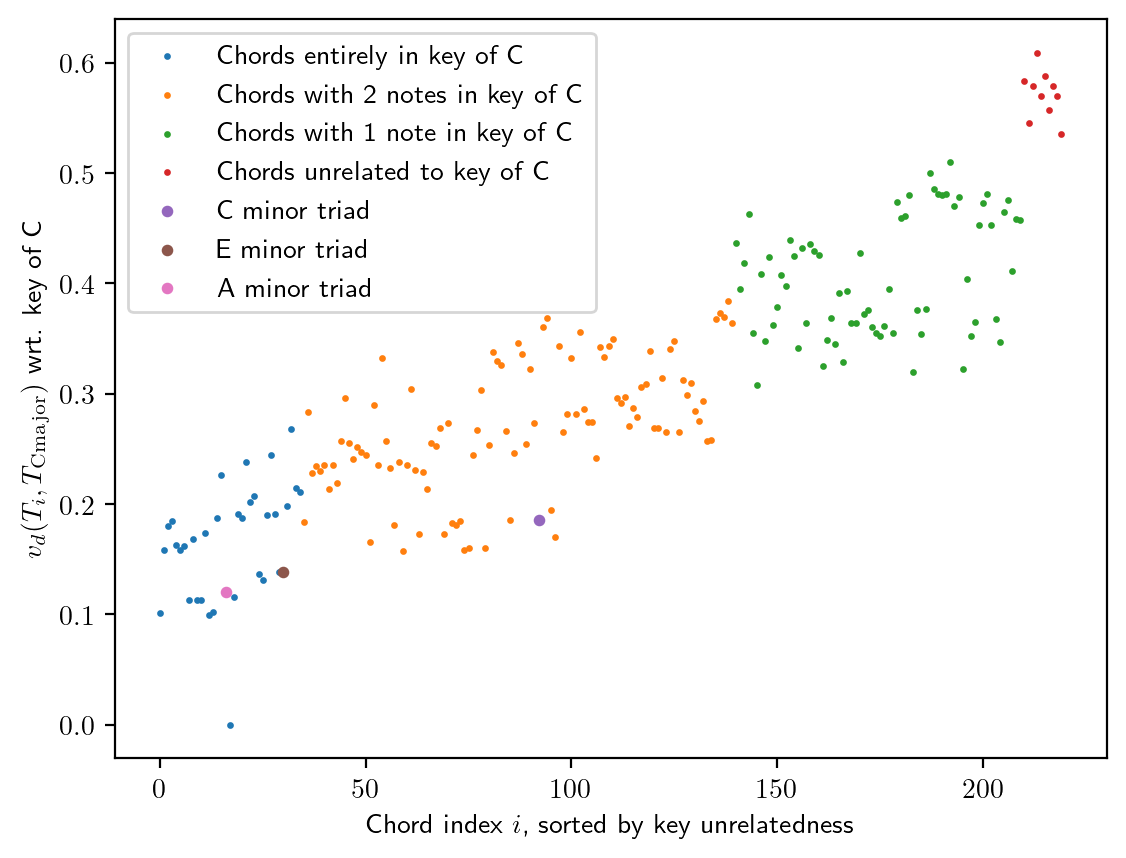

In [24]:
vl_dist = [anti_voice_leading(Chord(c), Chord([0,4,7]), Key("C")) for c in chords]
sorted_vl_dist = np.asarray(vl_dist)[order]

C_chords = list(filter(lambda c: chord_in_key_C(c), sorted_chords))
C_chords_idx = [sorted_chords.index(c) for c in C_chords]
C_chords_vl_dists = [sorted_vl_dist[i] for i in C_chords_idx]
plt.scatter(C_chords_idx, C_chords_vl_dists, s=2, label="Chords entirely in key of C")

C_2_chords = list(filter(lambda c: chord_in_key_C(c, 2), sorted_chords))
C_2_chords_idx = [sorted_chords.index(c) for c in C_2_chords]
C_2_chords_vl_dists = [sorted_vl_dist[i] for i in C_2_chords_idx]
plt.scatter(C_2_chords_idx, C_2_chords_vl_dists, s=2, label="Chords with 2 notes in key of C")

C_1_chords = list(filter(lambda c: chord_in_key_C(c, 1), sorted_chords))
C_1_chords_idx = [sorted_chords.index(c) for c in C_1_chords]
C_1_chords_vl_dists = [sorted_vl_dist[i] for i in C_1_chords_idx]
plt.scatter(C_1_chords_idx, C_1_chords_vl_dists, s=2, label="Chords with 1 note in key of C")

C_0_chords = list(filter(lambda c: chord_in_key_C(c, 0), sorted_chords))
C_0_chords_idx = [sorted_chords.index(c) for c in C_0_chords]
C_0_chords_vl_dists = [sorted_vl_dist[i] for i in C_0_chords_idx]
plt.scatter(C_0_chords_idx, C_0_chords_vl_dists, s=2, label="Chords unrelated to key of C")

cminor_idx = sorted_chords.index((0,3,7))
plt.scatter([cminor_idx], [sorted_vl_dist[cminor_idx]], s=10, label="C minor triad")

eminor_idx = sorted_chords.index((4,7,11))
plt.scatter([eminor_idx], [sorted_vl_dist[eminor_idx]], s=10, label="E minor triad")

aminor_idx = sorted_chords.index((0,4,9))
plt.scatter([aminor_idx], [sorted_vl_dist[aminor_idx]], s=10, label="A minor triad")

plt.xlabel("Chord index $i$, sorted by key unrelatedness")
plt.ylabel(r"$v_d(T_i, T_{\mathrm{C major}})$ wrt. key of C")

plt.legend()
plt.savefig("voice_leading_distance.png", dpi=300)

In [15]:
sorted_vl_dist[:10]
best = np.argsort(sorted_vl_dist)[:20]
display([sorted_chords[i] for i in best])
display([sorted_vl_dist[i] for i in best])

[(0, 4, 7),
 (0, 7, 9),
 (0, 2, 4),
 (4, 7, 9),
 (2, 4, 7),
 (0, 2, 7),
 (4, 5, 7),
 (0, 7, 11),
 (0, 4, 9),
 (0, 4, 11),
 (0, 4, 5),
 (0, 5, 7),
 (4, 7, 11),
 (0, 7, 8),
 (2, 7, 9),
 (0, 4, 10),
 (7, 9, 11),
 (0, 1, 7),
 (3, 4, 7),
 (0, 2, 9)]

[0.0,
 0.09971281893547075,
 0.10126444223026689,
 0.10226187956262928,
 0.11284402454589079,
 0.11284402454589079,
 0.11335815840758474,
 0.11570015089936604,
 0.12048652287226046,
 0.1307140105210451,
 0.13678109676608396,
 0.1381393924881401,
 0.13813939248814014,
 0.15719993730076126,
 0.1579085805697878,
 0.1581108421040794,
 0.1586185192433751,
 0.15986553960654162,
 0.15986553960654165,
 0.1615828977403767]

In [37]:
anti_voice_leading(Chord([6,8,10]), Chord([0,2,4]), Key("C"))

0.5000956087018111

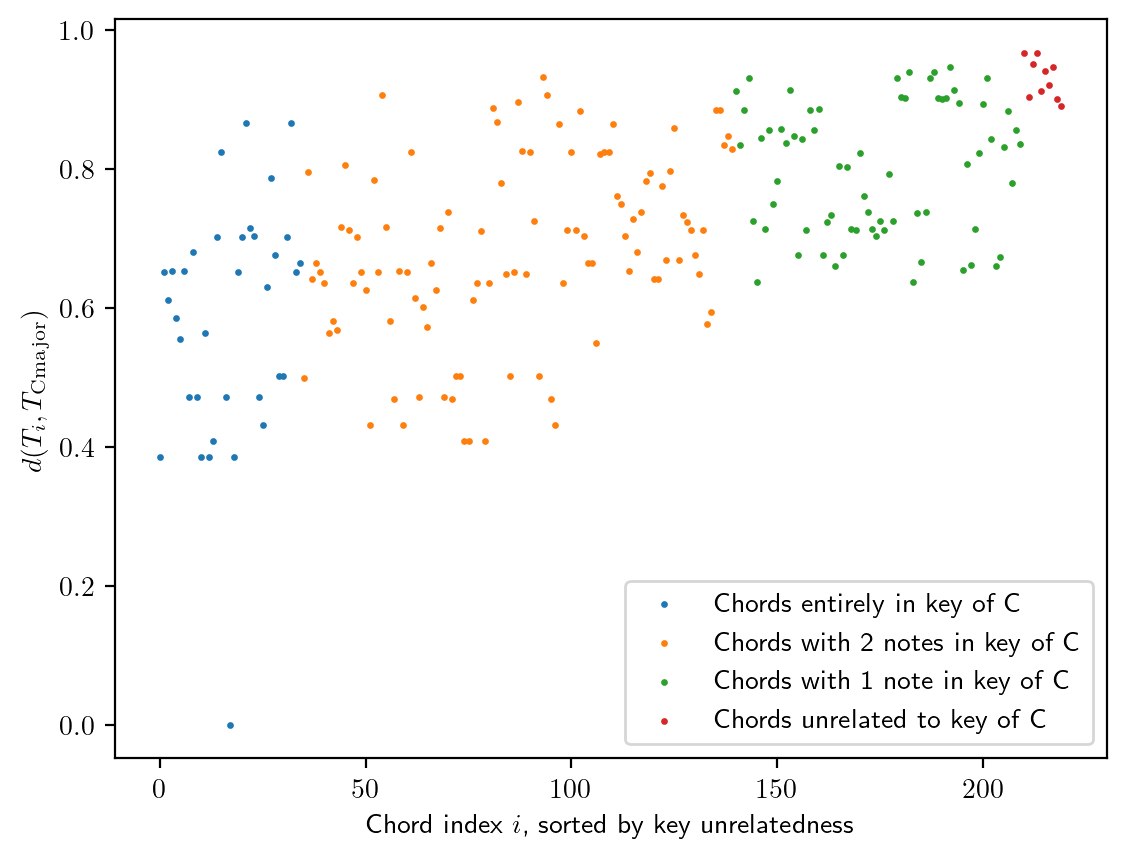

In [16]:
dist = [perceptual_unrelatedness(tiv(c), tiv([0,4,7])) for c in chords]
sorted_dist = np.asarray(dist)[order]


plt.scatter(C_chords_idx, sorted_dist[C_chords_idx], s=2, label="Chords entirely in key of C")

plt.scatter(C_2_chords_idx, sorted_dist[C_2_chords_idx], s=2, label="Chords with 2 notes in key of C")

plt.scatter(C_1_chords_idx, sorted_dist[C_1_chords_idx], s=2, label="Chords with 1 note in key of C")

plt.scatter(C_0_chords_idx, sorted_dist[C_0_chords_idx], s=2, label="Chords unrelated to key of C")

plt.xlabel("Chord index $i$, sorted by key unrelatedness")
plt.ylabel(r"$d(T_i, T_{\mathrm{C major}})$")

plt.legend()
plt.savefig("inverse_perceptual_dist.png", dpi=300)

In [17]:
sorted_dist[:10]
best = np.argsort(sorted_dist)[:20]
display([sorted_chords[i] for i in best])
display([sorted_dist[i] for i in best])

[(0, 4, 7),
 (0, 2, 4),
 (0, 7, 11),
 (0, 7, 9),
 (4, 5, 7),
 (0, 4, 10),
 (0, 1, 7),
 (4, 7, 9),
 (3, 4, 7),
 (0, 4, 11),
 (4, 7, 8),
 (0, 7, 8),
 (0, 3, 4),
 (4, 6, 7),
 (0, 1, 4),
 (0, 7, 10),
 (0, 6, 7),
 (4, 7, 10),
 (0, 4, 5),
 (0, 2, 7)]

[0.0,
 0.3854831351767761,
 0.3854831351767761,
 0.3854831351767761,
 0.3854831351767761,
 0.407996327466468,
 0.407996327466468,
 0.407996327466468,
 0.4079963274664681,
 0.431728425274288,
 0.431728425274288,
 0.431728425274288,
 0.431728425274288,
 0.4680227171864498,
 0.4680227171864498,
 0.4680227171864498,
 0.4712320534161947,
 0.4712320534161947,
 0.4712320534161947,
 0.4712320534161947]

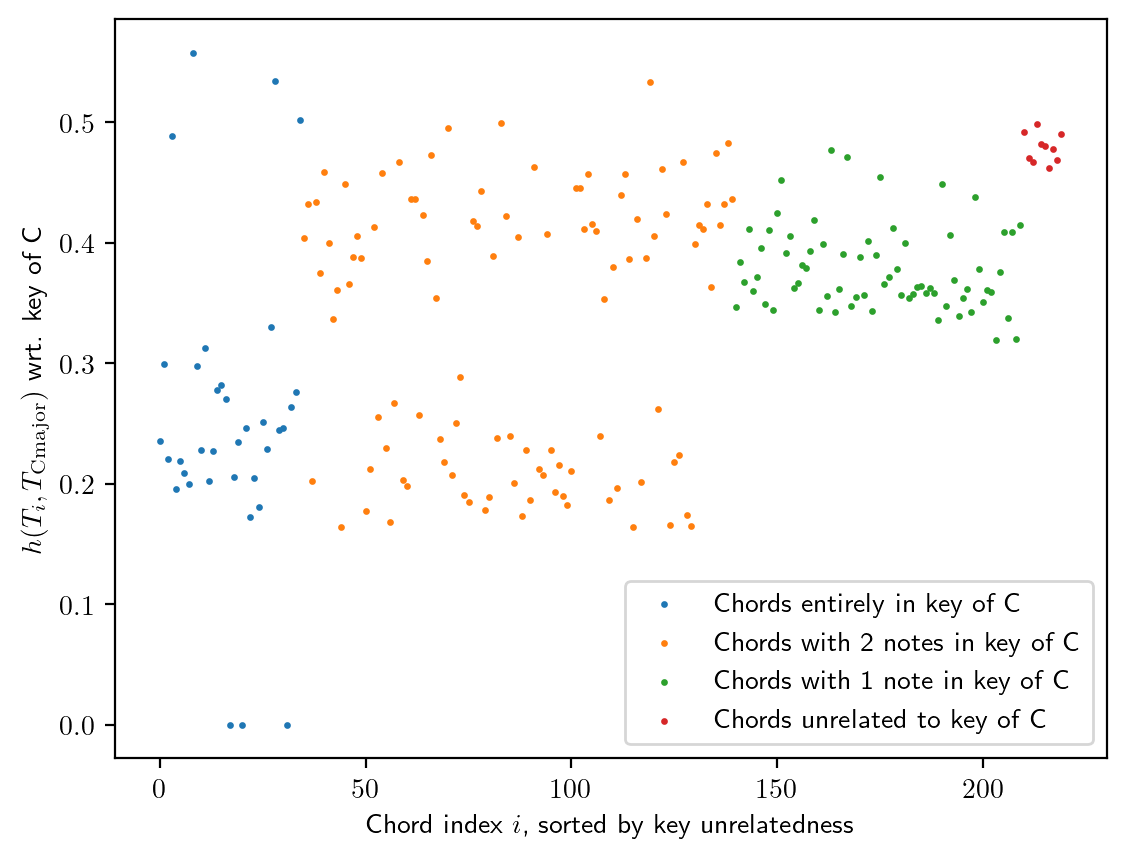

In [23]:
# tonnetz_chords = [c for c in chords if Chord(c).isMajorTriad() or Chord(c).isMinorTriad()]
sorted_hf_dist = np.asarray([harmonic_function_unrelatedness(tiv(c), Key("C")) for c in sorted_chords])
labels = np.asarray([Tf(tiv(c), Key("C"), return_rn=True)[1] for c in sorted_chords])
# hf_order = np.argsort(hf_dist)
# sorted_hf_chords = [tonnetz_chords[i] for i in hf_order]
# sorted_hf_dist = np.asarray(hf_dist)[hf_order]

# I_chords_idx = np.where(labels == "I")[0]
# plt.scatter(I_chords_idx, sorted_hf_dist[I_chords_idx], s=2, label="I")

# V_chords_idx = np.where(labels == "V")[0]
# plt.scatter(V_chords_idx, sorted_hf_dist[V_chords_idx], s=2, label="V")

# IV_chords_idx = np.where(labels == "IV")[0]
# plt.scatter(IV_chords_idx, sorted_hf_dist[IV_chords_idx], s=2, label="IV")

plt.scatter(C_chords_idx, sorted_hf_dist[C_chords_idx], s=2, label="Chords entirely in key of C")

plt.scatter(C_2_chords_idx, sorted_hf_dist[C_2_chords_idx], s=2, label="Chords with 2 notes in key of C")

plt.scatter(C_1_chords_idx, sorted_hf_dist[C_1_chords_idx], s=2, label="Chords with 1 note in key of C")

plt.scatter(C_0_chords_idx, sorted_hf_dist[C_0_chords_idx], s=2, label="Chords unrelated to key of C")


plt.xlabel("Chord index $i$, sorted by key unrelatedness")
plt.ylabel(r"$h(T_i, T_{\mathrm{C major}})$ wrt. key of C")

plt.legend()
plt.savefig("harmonic_function_unrelatedness.png", dpi=300)

In [19]:
display(np.sort(sorted_hf_dist)[3:10])
harmonic_function_unrelatedness(tiv(key.romanNumeral("viio")), Key("C"))

array([0.1643, 0.1643, 0.1648, 0.1659, 0.1679, 0.1721, 0.1731])

0.26355229496149635

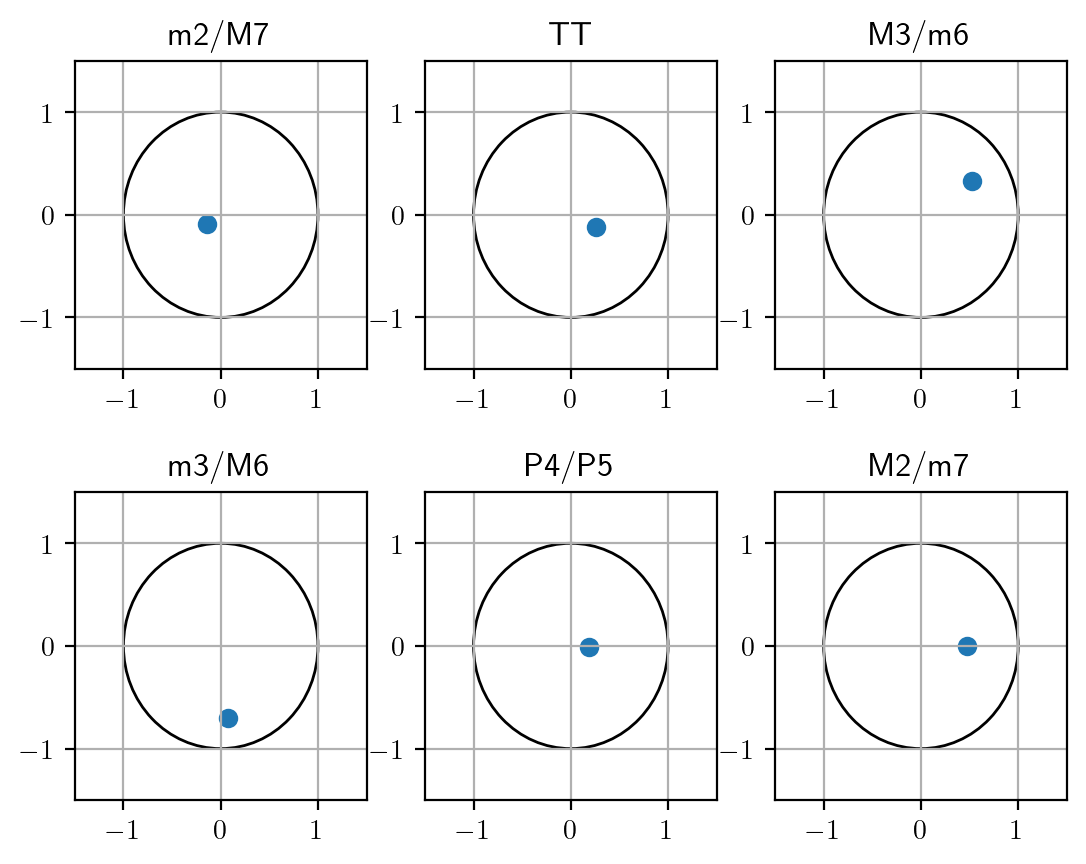

In [20]:
(tiv(Chord([0,4,7])) - tiv(key)).plot_tiv()

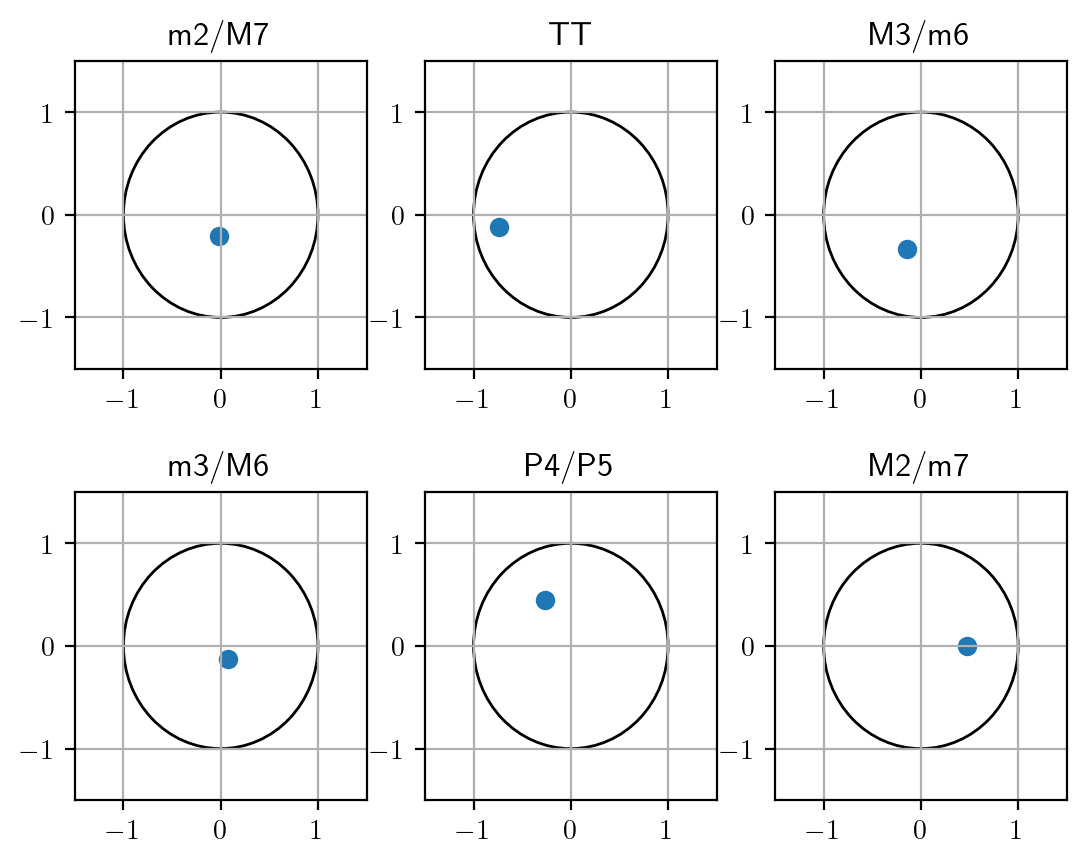

In [21]:
(tiv(Chord([2,4,9])) - tiv(key)).plot_tiv()